<a href="https://colab.research.google.com/github/iraidaantropova/lib_python/blob/main/%D0%98%D1%82%D0%BE%D0%B3%D0%BE%D0%B2%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_%D0%A1%D0%B8%D0%BD%D0%B8%D1%86%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Курсовой проект для курса "Python для Data Science"**
  
  Задание:
-Используя данные из train.csv, построить модель для предсказания цен на недвижимость (квартиры).
- С помощью полученной модели предсказать цены для квартир из файла test.csv.
-Целевая переменная:
Price

Метрика:
R2 - коэффициент детерминации 

**Подключение библиотек и скриптов**

In [197]:
import numpy as np
import pandas as pd
import random

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score as r2
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
import datetime
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [198]:
import warnings
warnings.filterwarnings('ignore')

In [199]:
matplotlib.rcParams.update({'font.size': 14})

In [200]:
def evalute_preds (train_true_values, train_pred_values, test_true_values, test_pred_values):
  print("Train R2:\t" + str(round(r2(train_true_values, train_pred_values),3)))
  print("Test R2:\t" + str(round(r2(test_true_values, test_pred_values),3)))

  plt.figure(figsize=(18,10))

  plt.subplot(121)
  sns.scatterplot(x=train_pred_values, y=train_true_values)
  plt.xlabel('Predicted values')
  plt.ylabel('True values')
  plt.title('Train sample prediction')

  plt.show()

**Пути к директориям и файлам**



In [201]:
TRAIN_DATASET_PATH = '/content/train.csv'

In [202]:
TEST_DATASET_PATH ='/content/test.csv'

In [203]:
RESULT_PATH = '/content/predictions.csv'

**Описание датасета**

Id - идентификационный номер квартиры,

DistrictId - идентификационный номер района,

Rooms - количество комнат,

Square - площадь,

LifeSquare - жилая площадь,

KitchenSquare - площадь кухни,

Floor - этаж,

HouseFloor - количество этажей в доме,

HouseYear - год постройки дома,

Ecology_1, Ecology_2, Ecology_3 - экологические показатели местности,

Social_1, Social_2, Social_3 - социальные показатели местности,

Healthcare_1, Helthcare_2 - показатели местности, связанные с охраной здоровья,

Shops_1, Shops_2 - показатели, связанные с наличием магазинов, торговых центров,

Price - цена квартиры.


**Загрузка данных**

In [204]:
df1 = pd.read_csv(TRAIN_DATASET_PATH)
df1.tail()


,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
9995,77,32,2.0,50.401785,30.476203,5.0,6,5.0,1968,0.135650,B,B,46,7960,6,350.0,3,11,B,196684.316040
9996,6159,18,1.0,41.521546,20.539216,9.0,13,13.0,2000,0.000000,B,B,30,5562,0,NaN,0,5,A,189050.289571
9997,5123,27,1.0,47.939008,NaN,1.0,12,16.0,2015,0.072158,B,B,2,629,1,NaN,0,0,A,159143.805370
9998,5400,75,2.0,43.602562,33.840147,8.0,1,5.0,1961,0.307467,B,A,30,5048,9,325.0,2,5,B,181595.339808
9999,6306,128,1.0,38.666645,21.157874,8.0,7,17.0,1990,0.000000,B,B,27,4798,0,30.0,2,8,B,218714.077615


In [205]:
df1.dtypes

Id                 int64
DistrictId         int64
Rooms            float64
Square           float64
LifeSquare       float64
KitchenSquare    float64
Floor              int64
HouseFloor       float64
HouseYear          int64
Ecology_1        float64
Ecology_2         object
Ecology_3         object
Social_1           int64
Social_2           int64
Social_3           int64
Healthcare_1     float64
Helthcare_2        int64
Shops_1            int64
Shops_2           object
Price            float64
dtype: object

In [206]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  int64  
 1   DistrictId     10000 non-null  int64  
 2   Rooms          10000 non-null  float64
 3   Square         10000 non-null  float64
 4   LifeSquare     7887 non-null   float64
 5   KitchenSquare  10000 non-null  float64
 6   Floor          10000 non-null  int64  
 7   HouseFloor     10000 non-null  float64
 8   HouseYear      10000 non-null  int64  
 9   Ecology_1      10000 non-null  float64
 10  Ecology_2      10000 non-null  object 
 11  Ecology_3      10000 non-null  object 
 12  Social_1       10000 non-null  int64  
 13  Social_2       10000 non-null  int64  
 14  Social_3       10000 non-null  int64  
 15  Healthcare_1   5202 non-null   float64
 16  Helthcare_2    10000 non-null  int64  
 17  Shops_1        10000 non-null  int64  
 18  Shops_2

In [207]:
df2 = pd.read_csv(TEST_DATASET_PATH)
df2.tail()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
4995,8180,11,3.0,67.133911,50.809797,6.0,5,9.0,1973,0.000170,B,B,36,5992,0,NaN,1,1,B
4996,4695,1,1.0,40.198472,21.807061,10.0,12,17.0,2017,0.007122,B,B,1,264,0,NaN,0,1,B
4997,5783,12,3.0,77.842178,48.282625,9.0,23,22.0,1989,0.090799,B,B,74,19083,2,NaN,5,15,B
4998,4780,62,2.0,81.305222,NaN,0.0,4,0.0,1977,0.072158,B,B,2,629,1,NaN,0,0,A
4999,12504,30,2.0,60.555693,NaN,1.0,10,17.0,1977,0.000078,B,B,22,6398,141,1046.0,3,23,B


In [208]:
print('Строк в dataset_train:', df1.shape[0])
print('Строк в dataset_test', df2.shape[0])

Строк в dataset_train: 10000
Строк в dataset_test 5000


В датасете train 10000 строк и 19 столбцов.
В признаках LifeSquare и Healthcare_1 существуют пропуски. 
Так же видим нечисловые признаки: Ecology_2, Ecology_3, Shops_2.
Также DistrictId и Id нужно отнести к категориальным признакам.

In [209]:
df1.DistrictId=df1.DistrictId.astype('object')
df1.Id=df1.Id.astype('object')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  object 
 1   DistrictId     10000 non-null  object 
 2   Rooms          10000 non-null  float64
 3   Square         10000 non-null  float64
 4   LifeSquare     7887 non-null   float64
 5   KitchenSquare  10000 non-null  float64
 6   Floor          10000 non-null  int64  
 7   HouseFloor     10000 non-null  float64
 8   HouseYear      10000 non-null  int64  
 9   Ecology_1      10000 non-null  float64
 10  Ecology_2      10000 non-null  object 
 11  Ecology_3      10000 non-null  object 
 12  Social_1       10000 non-null  int64  
 13  Social_2       10000 non-null  int64  
 14  Social_3       10000 non-null  int64  
 15  Healthcare_1   5202 non-null   float64
 16  Helthcare_2    10000 non-null  int64  
 17  Shops_1        10000 non-null  int64  
 18  Shops_2

Рассмотрим числовые признаки:

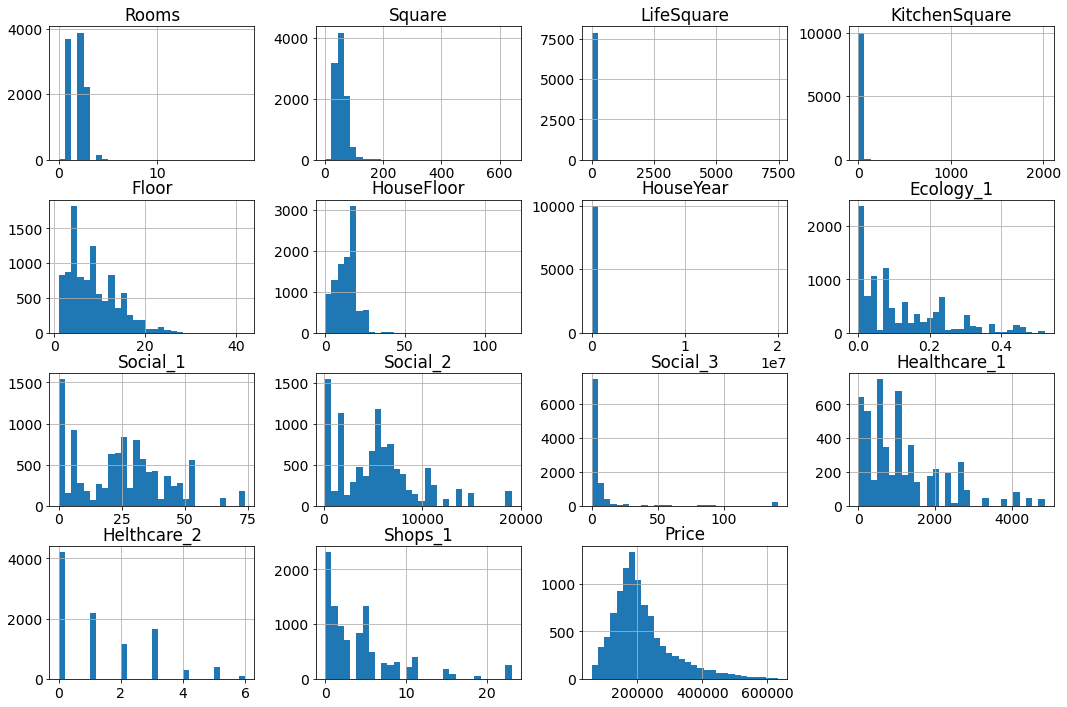

In [210]:
digital_features=df1.select_dtypes(exclude=['object'])
digital_features.hist(figsize=(18,12), bins=30)
plt.show()

Очевидно наличие выбросов в количестве комнат, площадях, годах постройки дома.
Helthcare_2 - скорее относится к категориальным признакам.
Показатели местности Social, и Shops сложно однозначно интерпретировать.

**Целевая переменная**

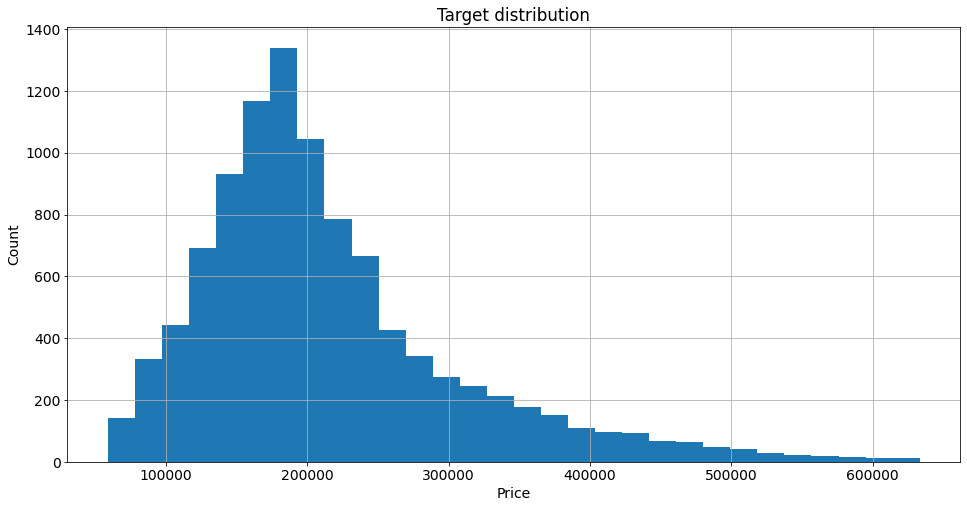

In [211]:
plt.figure(figsize = (16, 8))

df1['Price'].hist(bins=30)
plt.ylabel('Count')
plt.xlabel('Price')

plt.title('Target distribution')
plt.show()

**Номинативные переменные**




In [212]:
df1.select_dtypes(include='object').columns.tolist()

['Id', 'DistrictId', 'Ecology_2', 'Ecology_3', 'Shops_2']

In [213]:
df1['DistrictId'].value_counts()

27     851
1      652
23     565
6      511
9      294
      ... 
207      1
117      1
174      1
205      1
209      1
Name: DistrictId, Length: 205, dtype: int64

In [214]:
df1['Ecology_2'].value_counts()

B    9903
A      97
Name: Ecology_2, dtype: int64

In [215]:
df1['Ecology_3'].value_counts()

B    9725
A     275
Name: Ecology_3, dtype: int64

In [216]:
df1['Shops_2'].value_counts()

B    9175
A     825
Name: Shops_2, dtype: int64

In [217]:
df1.describe()

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


Jписание датасета подтверждает выводы по показателям признаков.

**Визуализируем выбросы: **


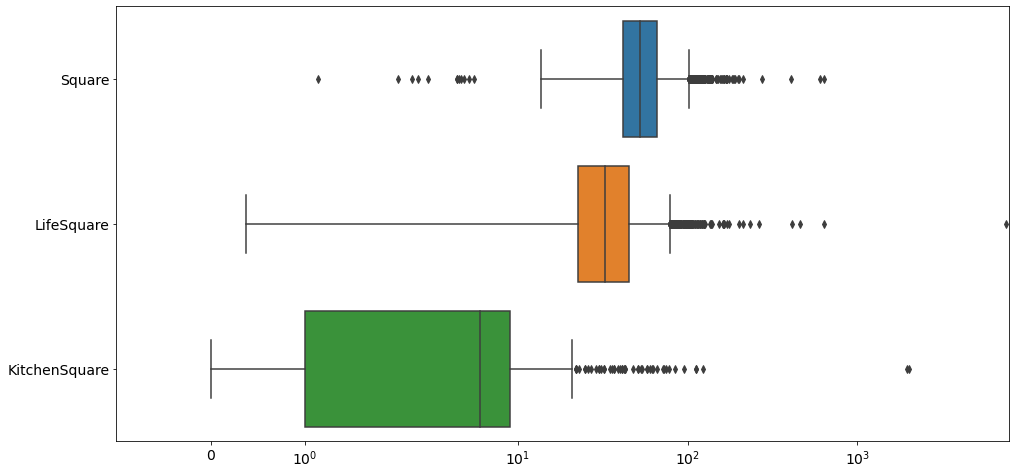

In [218]:
plt.figure(figsize=(16, 8))
sns.boxplot(data=df1[['Square', 'LifeSquare', 'KitchenSquare']], orient='h')
plt.xscale('symlog')
plt.xlim(left=-1)
plt.show()

При изучении объектов недвижимости одних из ключевых параметров явялется цена за квадратный метр, поэтому ввожу его в датасет


In [219]:
df1.insert(2,'SqMeterPrice', df1.Price/df1.Square)

In [220]:
df1.describe()

,SqMeterPrice,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,3988.383777,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,3755.437224,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,208.293451,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,2918.525328,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,3910.052336,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,4692.375993,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,230463.537966,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


Посмотрим на выбросы:

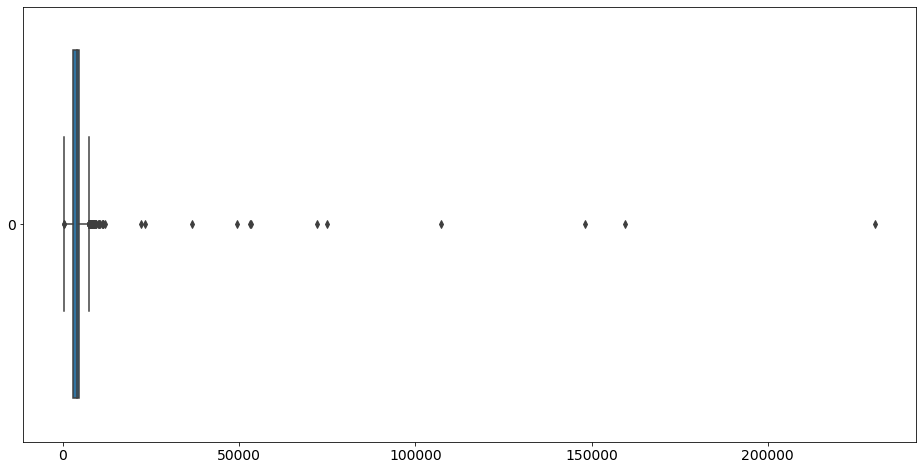

In [221]:
plt.figure(figsize=(16, 8))
sns.boxplot(data=df1.SqMeterPrice, orient='h')
plt.show()

Рассмотрим площадь недвижимости: 

In [222]:
df1.sort_values(by='Square', axis=0, ascending=True).head()

,Id,DistrictId,SqMeterPrice,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,...,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
6392,14786,1,159593.107918,1.0,1.136859,4.525736,1.0,3,1.0,1977,...,B,B,1,264,0,NaN,0,1,B,181434.825589
8283,15744,34,230463.537966,1.0,1.988943,2.642219,1.0,21,4.0,1977,...,B,B,53,13670,4,NaN,1,11,B,458378.777006
4853,3224,27,53253.578837,0.0,2.377248,0.873147,0.0,1,0.0,1977,...,B,B,2,469,0,NaN,0,0,B,126596.941798
1608,10202,6,52996.529388,1.0,2.596351,4.604943,1.0,3,25.0,2014,...,B,B,5,1564,0,540.0,0,0,B,137597.601458
9294,6782,45,148259.792432,1.0,2.954309,5.257278,1.0,3,1.0,1977,...,B,B,23,5212,6,NaN,3,2,B,438005.182323


Датасет заполнен хаотичными данными, тк врятли жилые помщения будут с площадью 2-3 кв. м.
Цена за кв.м тоже говорит об этом.


In [223]:
df1.loc[(df1.Square<1.3), 'Square']= df1['Square']*100
df1.loc[(df1.Square<=13), 'Square']= df1['Square']*10
df1.loc[(df1.Square>300), 'Square']= df1['Square']/10

In [224]:
df1.drop('SqMeterPrice', axis=1, inplace=True)
df1.insert(2,'SqMeterPrice', df1.Price/df1.Square)

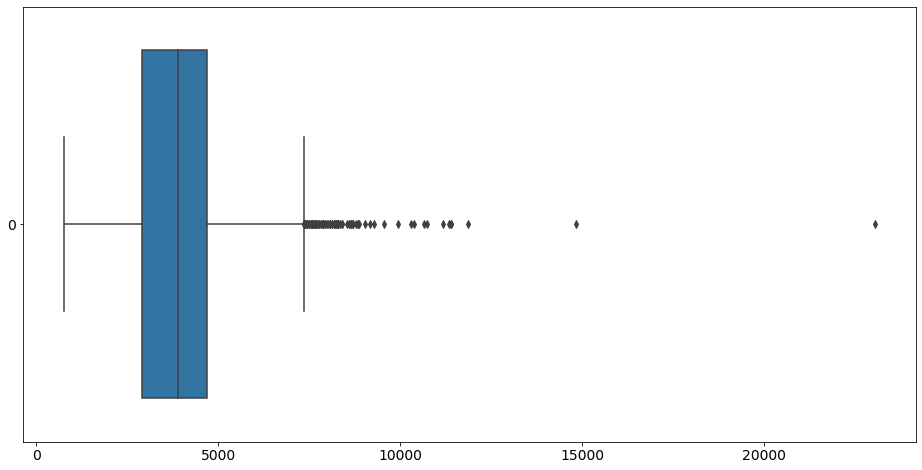

In [225]:
plt.figure(figsize=(16, 8))
sns.boxplot(data=df1.SqMeterPrice, orient='h')
plt.show()

Убрала объекты с совсем низкой стоимостью квадратного метра. Объекты с высокой стоимостью убирать не стала, т.к. это могут быть элитные объекты недвижимости

Рассмотрим корреляцию между признаками

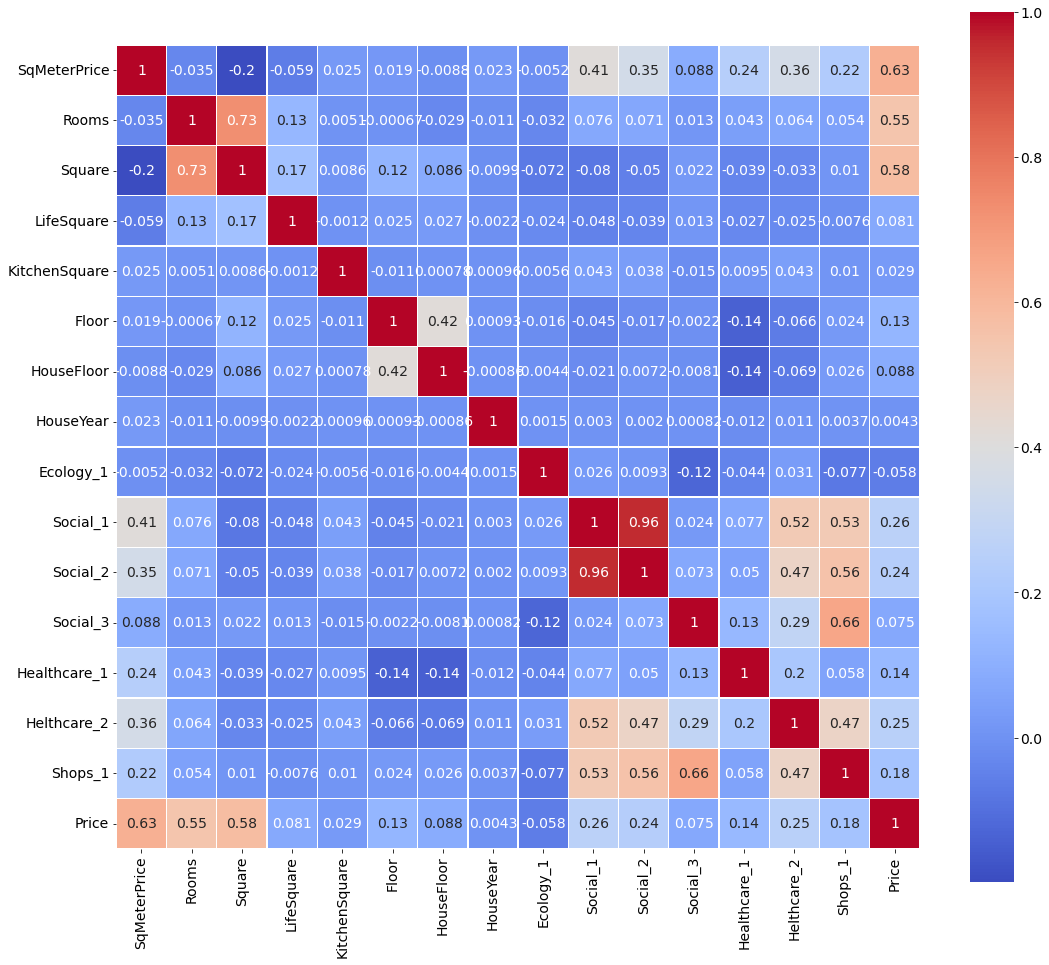

In [226]:
df1_corr=df1.corr()
plt.figure(figsize=(18,16))
sns.heatmap(df1_corr, annot=True, linewidths=0.3, cmap='coolwarm', square=True)
plt.show()

Целевая переменная существено зависит от количества комнат и площади

In [227]:
df1.Rooms.unique()

array([ 2.,  3.,  1.,  4., 10.,  0.,  5., 19.,  6.])

In [228]:
df1[df1.Rooms>6]

,Id,DistrictId,SqMeterPrice,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,...,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
377,5927,57,5372.190561,10.0,59.056975,36.223072,10.0,22,22.0,2002,...,B,B,74,19083,2,NaN,5,15,B,317265.323792
1454,8491,1,1865.555669,19.0,42.006046,21.779288,7.0,17,17.0,2014,...,B,B,1,264,0,NaN,0,1,B,78364.616704
8849,14865,9,2831.044647,10.0,60.871266,38.420681,10.0,3,2.0,1994,...,B,B,25,5648,1,30.0,2,4,B,172329.270863


In [229]:
df1[df1.Rooms==0]

,Id,DistrictId,SqMeterPrice,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,...,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
1397,12638,27,1938.880408,0.0,138.427694,136.215499,0.0,4,3.0,2016,...,B,B,11,3097,0,NaN,0,0,B,268394.744389
1981,7917,27,1419.282909,0.0,212.932361,211.231125,0.0,2,3.0,2008,...,B,B,9,1892,0,NaN,0,1,B,302211.260887
2269,7317,27,2348.119347,0.0,41.790881,NaN,0.0,13,0.0,1977,...,B,B,9,1892,0,NaN,0,1,B,98129.976788
3911,770,28,4385.488771,0.0,49.483501,NaN,0.0,16,0.0,2015,...,B,B,30,6207,1,1183.0,1,0,B,217009.338463
4366,456,6,2612.112170,0.0,81.491446,NaN,0.0,4,0.0,1977,...,B,B,5,1564,0,540.0,0,0,B,212864.799112
4853,3224,27,5325.357884,0.0,23.772476,0.873147,0.0,1,0.0,1977,...,B,B,2,469,0,NaN,0,0,B,126596.941798
6149,3159,88,4108.784399,0.0,38.697117,19.345131,9.0,9,16.0,1982,...,B,B,43,8429,3,NaN,3,9,B,158998.110646
8834,9443,27,2498.580012,0.0,87.762616,85.125471,0.0,5,15.0,1977,...,B,B,9,1892,0,NaN,0,1,B,219281.918007


In [230]:
df1.Rooms.mode()

0    2.0
dtype: float64

Можно заменить значения выше 6 и меньше 1 на более частые значения количества комнат.


Посмотрим на пропуски в данных:

In [231]:
df1.isnull().sum()

Id                  0
DistrictId          0
SqMeterPrice        0
Rooms               0
Square              0
LifeSquare       2113
KitchenSquare       0
Floor               0
HouseFloor          0
HouseYear           0
Ecology_1           0
Ecology_2           0
Ecology_3           0
Social_1            0
Social_2            0
Social_3            0
Healthcare_1     4798
Helthcare_2         0
Shops_1             0
Shops_2             0
Price               0
dtype: int64

2113 пропусков в LifeSquare, 4798 в Healthcare_1. Можно попробовать удалить признак Healthcare_1. 
Но прежде можно попробовать понять, что за признаки, связанные с экологией, здоровьем, магазинами и т.д.

In [232]:
for feature in df1.columns[10:-1]:
    print(f'Признак - {feature}\tУникальных значений - {df1[feature].nunique()}.')

Признак - Ecology_1	Уникальных значений - 129.
Признак - Ecology_2	Уникальных значений - 2.
Признак - Ecology_3	Уникальных значений - 2.
Признак - Social_1	Уникальных значений - 51.
Признак - Social_2	Уникальных значений - 142.
Признак - Social_3	Уникальных значений - 30.
Признак - Healthcare_1	Уникальных значений - 79.
Признак - Helthcare_2	Уникальных значений - 7.
Признак - Shops_1	Уникальных значений - 16.
Признак - Shops_2	Уникальных значений - 2.


Уникальных значений незначительное количество, и вероятно это характеристики района. Пропуски в Healthcare_1 можно попробовать заполнить методом 'pad', отсортировав датасет по району.
Пропуски по жилой площади заполним таким же образом, предварительно отсортировав датасет по общей площади.

Так же можно трансформировать год постройки дома в более понятный возраст дома.



**Подготовка данных**

In [233]:
class FeaturesGenerator():
    
    def __init__(self):
        
        self.current_year=None
        self.cat_columns=None
        self.rsqm=None
        self.nsqm=None
        
        
    def fit(self,df1):
        
        # Текущий год для вычисления возраста дома
        
        self.current_year=datetime.datetime.now().year
        
        # Корректируем значения площадей и количество комнат
        
        df1.loc[(df1.Square<1.3), 'Square']= df1['Square']*100
        df1.loc[(df1.Square<=13), 'Square']= df1['Square']*10
        df1.loc[(df1.Square>300), 'Square']= df1['Square']/10
        df1.loc[((df1.Rooms>6)|(df1.Rooms==0)), 'Rooms']=2
       
        
        # Добавляем стоимость кв.м для последующей агрегации данных в обучающей и тестовой выборках
        
        df1.insert(1, 'SqMeterPrice',df1['Price']/df1['Square'])
        
        # Вычисляем на тесте среднюю стоимость кв.м в зависимости от к-ва комнат(для обработки пропусков в тестовом датасете),
        # и среднюю стоимость кв.м в зависимости от района и количества комнат
        
        self.rsqm=df1.groupby(by=['Rooms'])['SqMeterPrice'].mean().rename('RoomSqMeterPrice', inplace=True)
        self.nsqm=df1.groupby(by=['DistrictId','Rooms'])['SqMeterPrice'].mean().rename('DistSqMeterPrice', inplace=True) 
        
        # Удаляем лишнее
        
        df1.drop('SqMeterPrice', axis=1, inplace=True)
        
        # Назначаем столбцы для последующего дамми-кодирования
        
        self.cat_columns=df1.select_dtypes('object').columns
        
        
        
    def transform(self, df1):
        
        # Заменяем год постройки дома на возраст дома(выбросы по году постройки предварительно исправляем на текущий год)
        
        df1.loc[(df1.HouseYear>self.current_year),'HouseYear']=self.current_year-1
        df1.insert(df1.columns.get_loc('HouseYear'), 'HousAge', self.current_year - df1['HouseYear'])
        df1.drop('HouseYear', axis=1, inplace=True)
       
        # Кодируем категориальные переменные
        
        df1=pd.get_dummies(df1, columns=self.cat_columns)
        
        # Корректируем значения площадей в тестовом датасете
        
        df1.loc[(df1.Square<1.3), 'Square']= df1['Square']*100
        df1.loc[(df1.Square<=13), 'Square']= df1['Square']*10
        df1.loc[(df1.Square>300), 'Square']= df1['Square']/10
        
        # Корректируем количество комнат в тестовом датасете
        
        df1.loc[((df1.Rooms>6)|(df1.Rooms==0)), 'Rooms']=2
                
        # Обрабатываем пропуски полях Healthcare_1 и LifeSquare, заполняя их методом 'pad'
        
        df1=df1.sort_values(by='DistrictId')
        df1.Healthcare_1.fillna(method='pad',inplace=True)
        df1=df1.sort_values(by='Square')
        df1.LifeSquare.fillna(method='pad',inplace=True)
        df1.sort_index(inplace=True)
        
        # Добавляем поле DistSqMeterPrice содержащее среднюю стоимость кв.м в зависимости от района и количества комнат
        
        df1=df1.merge(self.rsqm, how='left', on='Rooms')
        df1=df1.merge(self.nsqm, how='left', on=['DistrictId', 'Rooms'])
        df1.insert(1, 'DistSqMeterPrice', df1.pop('DistSqMeterPrice'))
        
        # Заменяем пропуски, которые получились из-за того, что в тесте и трейне есть несовпадающие по Id районы,
        # на среднюю стоимость кв.м в зависимости от площади
        
        df1.DistSqMeterPrice.fillna(df1.RoomSqMeterPrice, inplace=True)
        
        # Удаляем лишнее
        
        df1.drop('RoomSqMeterPrice', axis=1, inplace=True)
        
        # Переводим DistrictId, и Id в нечисловые признаки
        
        df1['DistrictId']=df1['DistrictId'].astype('object')
        df1['Id']=df1['Id'].astype('object')
        
        return df1

преобразуем данные

In [234]:
data = pd.read_csv(TRAIN_DATASET_PATH)
generator=FeaturesGenerator()
generator.fit(data)
DF=generator.transform(data)
X_test=generator.transform(df2)


In [235]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id                10000 non-null  object 
 1   DistSqMeterPrice  10000 non-null  float64
 2   DistrictId        10000 non-null  object 
 3   Rooms             10000 non-null  float64
 4   Square            10000 non-null  float64
 5   LifeSquare        10000 non-null  float64
 6   KitchenSquare     10000 non-null  float64
 7   Floor             10000 non-null  int64  
 8   HouseFloor        10000 non-null  float64
 9   HousAge           10000 non-null  int64  
 10  Ecology_1         10000 non-null  float64
 11  Social_1          10000 non-null  int64  
 12  Social_2          10000 non-null  int64  
 13  Social_3          10000 non-null  int64  
 14  Healthcare_1      10000 non-null  float64
 15  Helthcare_2       10000 non-null  int64  
 16  Shops_1           10000 non-null  int64  

**Выбор и обучение модели**

В качестве модели предсказания выбираю модель GradientBoostingRegressor из библиотеки sklearn. 
Параметры модели были подобраны при помощи GridSearchCV.

Отделяем от датафрейма целевую переменную Price, так же удалим столбец Id который не несет смысловой нагрузки для модели.

In [236]:
y_train=DF.Price
X_train=DF.drop(['Id', 'Price'], axis=1)
# Столбец 'Id' из тестовых данных сохраним, он будет нужен для файла с результатом
test_idx=X_test.pop('Id')

In [237]:
X_train.shape, X_test.shape, y_train.shape

((10000, 22), (5000, 22), (10000,))

In [238]:
%%time
from sklearn.ensemble import GradientBoostingRegressor
model=GradientBoostingRegressor(learning_rate=0.02, max_depth=5, max_features=0.5, n_estimators=700, random_state=24 )
model.fit(X_train, y_train)
pred=model.predict(X_test)

CPU times: user 13.5 s, sys: 11.9 ms, total: 13.5 s
Wall time: 13.5 s


In [239]:
model.score(X_train,y_train)

0.8775993785935032

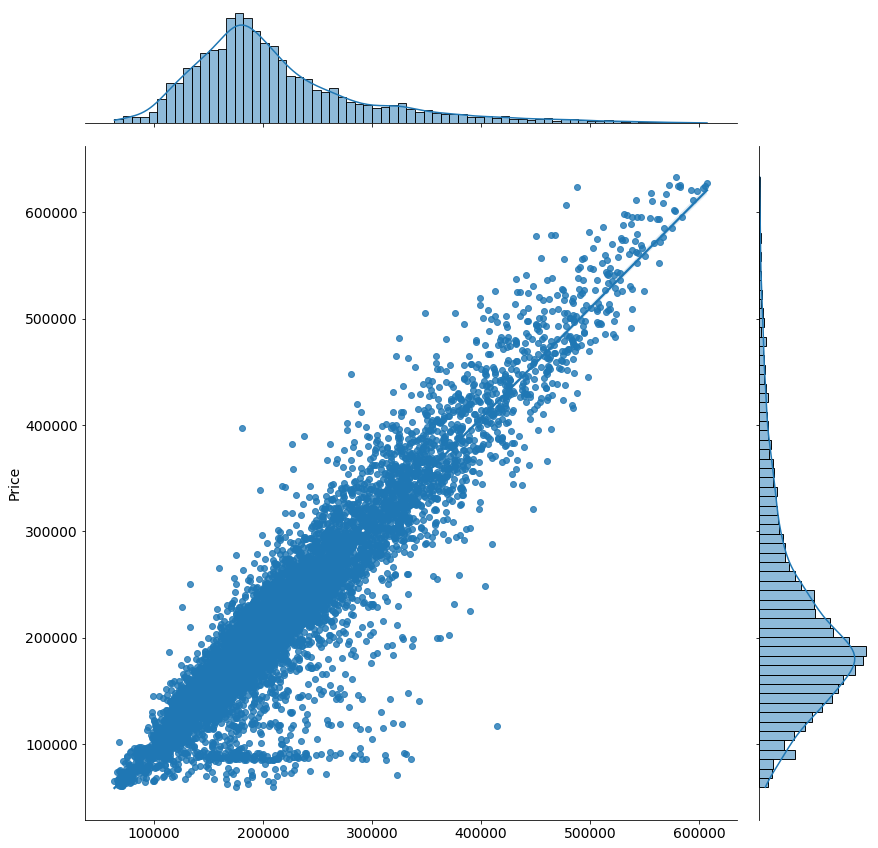

In [240]:
sns.jointplot(x=model.predict(X_train), y=y_train, kind='reg', height=12)
plt.show()

какие признаки модель определила как  значимые:

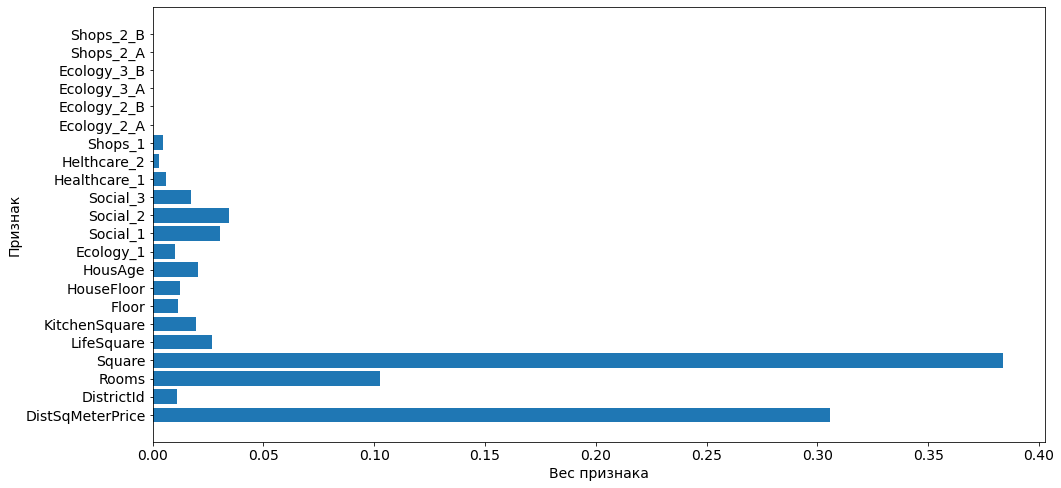

In [241]:
plt.figure(figsize=(16,8))
plt.barh(X_train.columns.tolist(), model.feature_importances_)
plt.xlabel('Вес признака')
plt.ylabel('Признак')
plt.show()

Загрузка результата:

In [242]:
result=pd.DataFrame({'Id':test_idx, 'Price':pred})
result.head()

,Id,Price
0,725,154319.476091
1,15856,209092.909415
2,5480,90811.135059
3,15664,310358.925823
4,14275,139190.980888


In [243]:
result.to_csv(RESULT_PATH, index=False)